# EDA

In [2]:
#importing required librarries for data analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
df=pd.read_csv('data_user_modelling.csv')#reading the dataframe

In [4]:
info_df=pd.read_csv('information.csv')#reading the information dataframe
info_df.head()

,Data Set Characteristics: Multivariate,Unnamed: 1,Attribute Information:
0,Number of Instances: 403,NaN,STG (The degree of study time for goal object ...
1,Area: Education,NaN,SCG (The degree of repetition number of user f...
2,Attribute Characteristics: Real,NaN,STR (The degree of study time of user for rela...
3,Number of Attributes: 5,NaN,LPR (The exam performance of user for related ...
4,Associated Tasks: Classification,NaN,PEG (The exam performance of user for goal obj...


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   STG     403 non-null    float64
 1   SCG     403 non-null    float64
 2   STR     403 non-null    float64
 3   LPR     403 non-null    float64
 4   PEG     403 non-null    float64
 5    UNS    403 non-null    object 
dtypes: float64(5), object(1)
memory usage: 19.0+ KB
None


- **There are no non empty columns.**

In [6]:
#Dimension of df
print(f"The dimension of the dataset is:{df.shape}")

The dimension of the dataset is:(403, 6)


In [7]:
#column names
df.rename(columns = {' UNS':'Knowledge_Level'}, inplace = True) 

df.columns


Index(['STG', 'SCG', 'STR', 'LPR', 'PEG', 'Knowledge_Level'], dtype='object')

- **UNS(knowledge level of the user) is the target feature.**

In [8]:
#data types
df.dtypes

STG                float64
SCG                float64
STR                float64
LPR                float64
PEG                float64
Knowledge_Level     object
dtype: object

- **All the columns except UNS hold float value datatype data.**
- **UNS holds string or any other object datatype.**

In [9]:
#Checking for Missing values 
df.isna().sum()

STG                0
SCG                0
STR                0
LPR                0
PEG                0
Knowledge_Level    0
dtype: int64

- **There are no missing values.**

In [10]:
df.head()

,STG,SCG,STR,LPR,PEG,Knowledge_Level
0,0.00,0.00,0.00,0.00,0.00,Very_Low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.06,0.06,0.05,0.25,0.33,Low
3,0.10,0.10,0.15,0.65,0.30,Middle
4,0.08,0.08,0.08,0.98,0.24,Low


In [11]:
#number of duplicate values
df.duplicated().sum()

0

- **No duplicate values are observed in the data.**

In [12]:
df.describe()

,STG,SCG,STR,LPR,PEG
count,403.000000,403.000000,403.000000,403.000000,403.000000
mean,0.353141,0.355940,0.457655,0.431342,0.456360
std,0.212018,0.215531,0.246684,0.257545,0.266775
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.200000,0.265000,0.250000,0.250000
50%,0.300000,0.300000,0.440000,0.330000,0.400000
75%,0.480000,0.510000,0.680000,0.650000,0.660000
max,0.990000,0.900000,0.950000,0.990000,0.990000


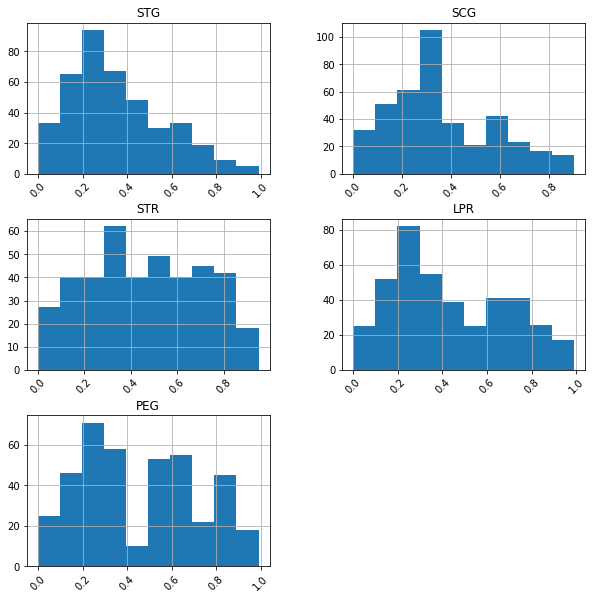

In [13]:
#Histogram of attributes
df.hist(figsize=(10,10), xrot=45)
plt.show()

In [14]:
df.describe(include='object')

,Knowledge_Level
count,403
unique,4
top,Low
freq,129


In [15]:
#stats on class labels
df['Knowledge_Level'].value_counts()

Low         129
Middle      122
High        102
Very_Low     50
Name: Knowledge_Level, dtype: int64

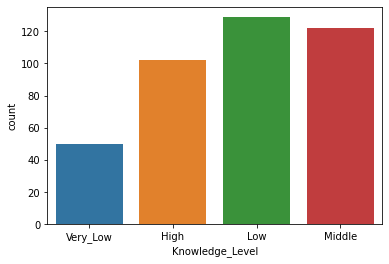

In [16]:
sns.countplot(x='Knowledge_Level',data=df)
plt.show()

### OBSERVATIONS:
- **Maximum number of sutdents have LOW Level of Knowledge followed by Middle and then High and at last are the very_low.**
- **Count shows very less difference in the number of students having Middle and Low Level Knowledge.**



In [17]:
correlation=df.corr()
correlation

,STG,SCG,STR,LPR,PEG
STG,1.000000,0.049023,-0.051889,0.113957,0.198629
SCG,0.049023,1.000000,0.121235,0.119716,0.193566
STR,-0.051889,0.121235,1.000000,0.083423,0.148338
LPR,0.113957,0.119716,0.083423,1.000000,-0.039283
PEG,0.198629,0.193566,0.148338,-0.039283,1.000000


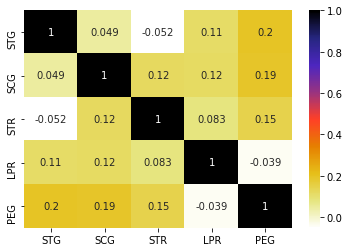

In [18]:
#plotting heatmap for correlation
sns.heatmap(correlation,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

### OBSERVATIONS:
- **There is no linear correlation between any of the features.**  
- **NO strong correlations were observed between the features.** 
- **From heat map lpr and Peg scores have the negative correlation.**

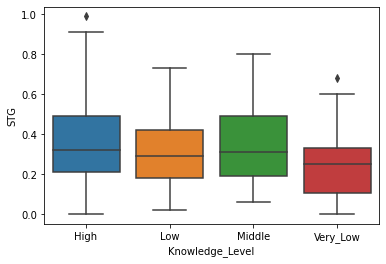

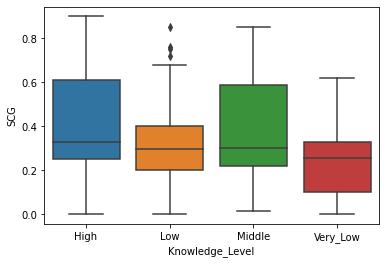

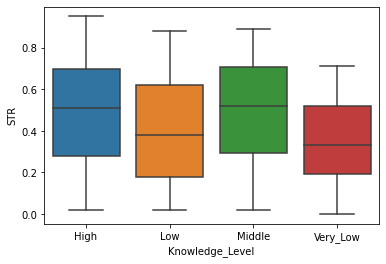

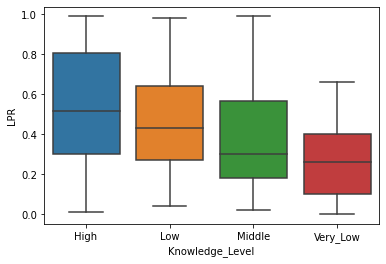

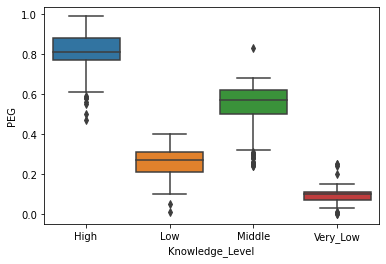

In [19]:
#boxplots
num_cols = ['STG', 'SCG', 'STR', 'LPR', 'PEG']
for col in num_cols:
    sns.boxplot(x = df['Knowledge_Level'].astype('category'), y = col, data=df)
    plt.show()

### OBSERVATIONS:
- **Here we can see the presence of outliers in the feature PEG.**


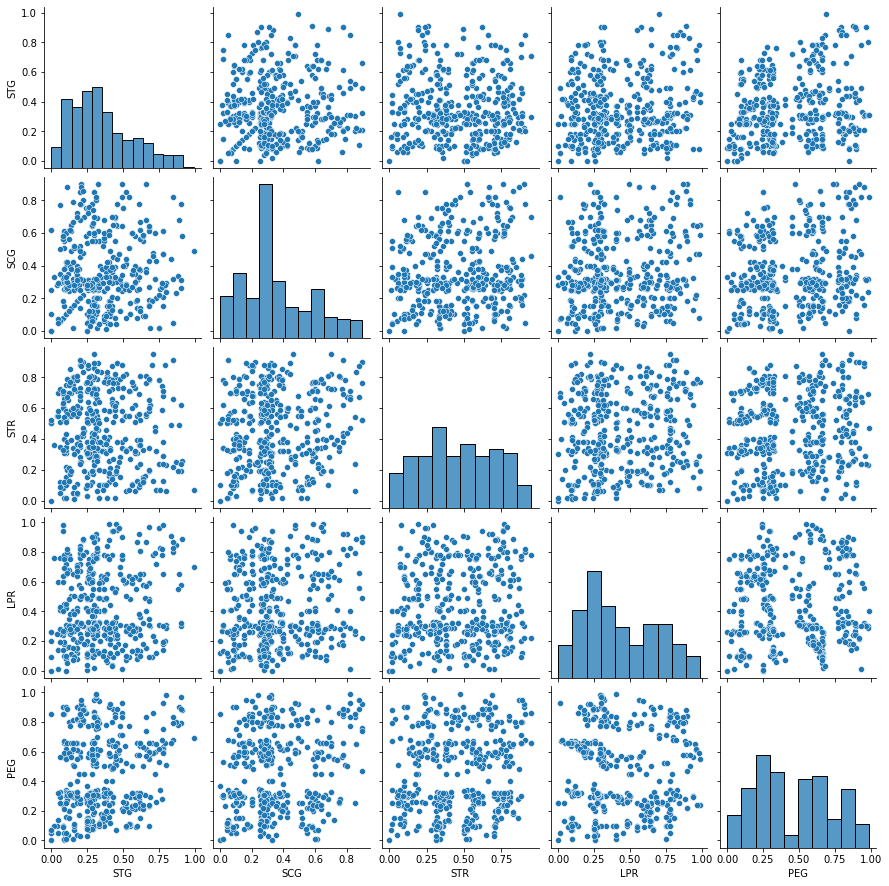

In [20]:
#pairplot
sns.pairplot(df)
plt.show()

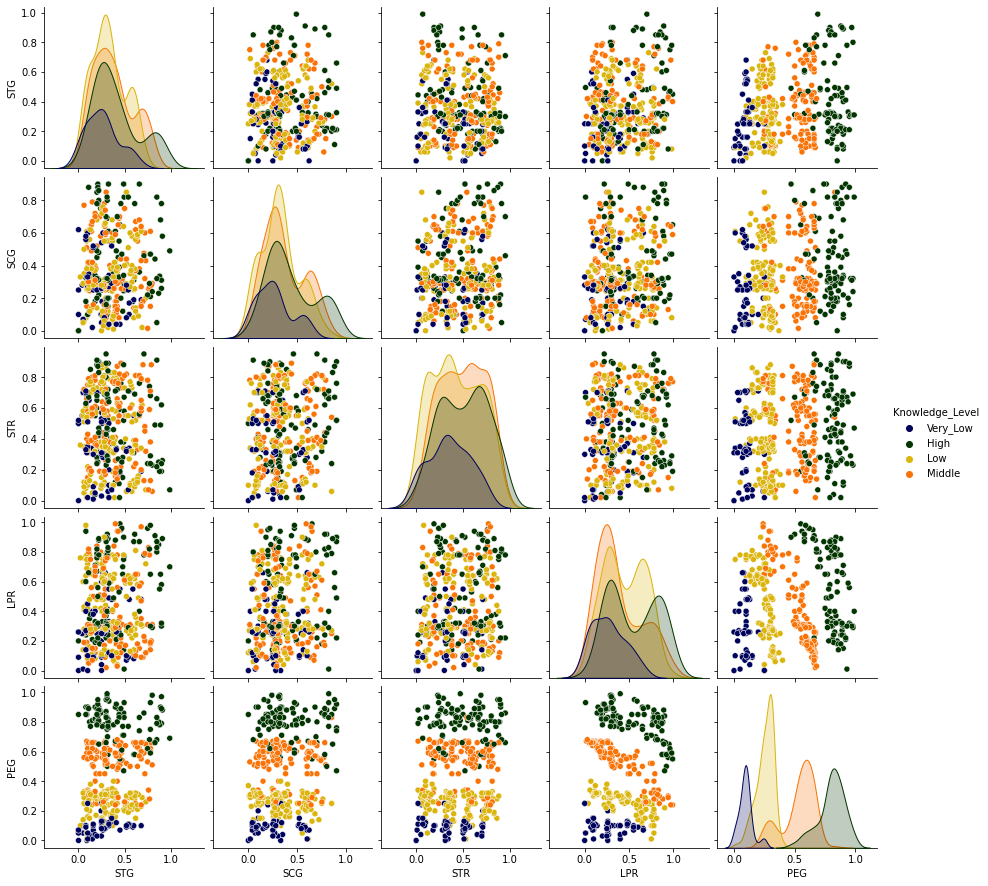

In [21]:
# Create a custom color palete to view the seperability more clearly
palette = sns.xkcd_palette(['dark blue', 'dark green', 'gold', 'orange'])
sns.pairplot(df,hue = 'Knowledge_Level',palette= palette)
plt.show()

### OBSERVATIONS:

- **For feature PEG we have good seperability when compared with other features between the four knowledge levels.**  
- **The diagonals show the univariate distributions of each feature.**

# Classification Problem

In [22]:
#importing required libararies for classification
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.model_selection import learning_curve,cross_val_score,validation_curve
from sklearn.ensemble import RandomForestClassifier




In [23]:
y=df['Knowledge_Level']
X=df.drop('Knowledge_Level',axis=1)

In [24]:
#splitting into train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# KNN

In [25]:
#library from sklearn for knn
from sklearn.neighbors import KNeighborsClassifier


In [26]:
knn= KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train,y_train)
knn_pred=knn.predict(X_test)
print(classification_report(y_test,knn_pred))


              precision    recall  f1-score   support

        High       0.90      0.96      0.93        27
         Low       0.79      1.00      0.88        37
      Middle       0.97      0.86      0.91        43
    Very_Low       1.00      0.50      0.67        14

    accuracy                           0.88       121
   macro avg       0.91      0.83      0.85       121
weighted avg       0.90      0.88      0.88       121



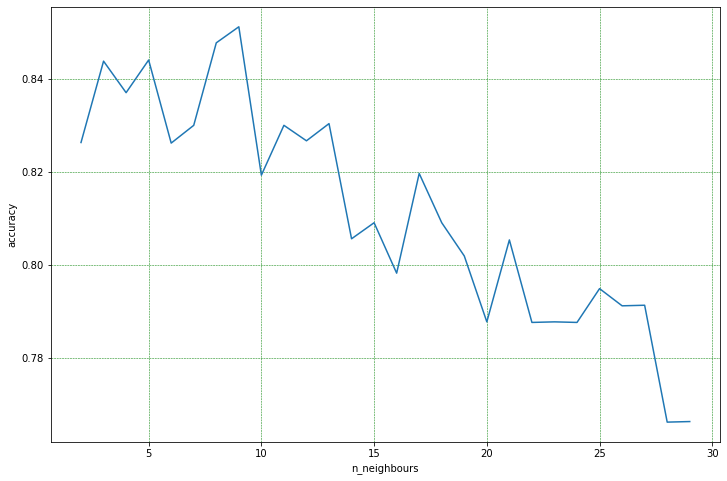

In [27]:
#Plotting graph between accuracy and k values for selecting optimum k value
avg_score=[]
for k in range(2,30):
    knn=KNeighborsClassifier(n_jobs=-1,n_neighbors=k)
    score=cross_val_score(knn,X_train,y_train,cv=10,n_jobs=-1,scoring='accuracy')
    avg_score.append(score.mean())
    
plt.figure(figsize=(12,8))
plt.plot(range(2,30),avg_score)
plt.xlabel("n_neighbours")
plt.ylabel("accuracy")
plt.grid(color = 'green', linestyle = '--', linewidth = 0.5)
plt.show()

# observations:

**From above graph we can say that maximum accuracy for knn is obtained for k=9**

In [28]:
#function for forming confusion matrix.

def confusion_matrix(actual,predicted):
    d=pd.DataFrame({'Actual':actual,'Predicted':predicted})
    c_matrix=pd.crosstab(d['Actual'],d['Predicted'])
    return c_matrix

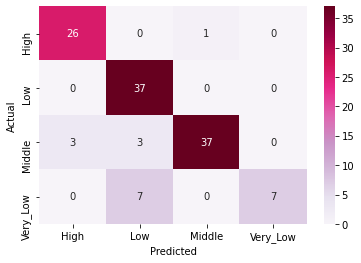

In [29]:
confusion_matrix_knn=confusion_matrix(y_test,knn_pred)
sns.heatmap(confusion_matrix_knn,annot=True,cmap='PuRd')
plt.show()

# SVM

In [30]:
#libraries for svm
from sklearn import svm
from sklearn.svm import SVC

In [31]:
#Getting svm classifier for different kernels.
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=2, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [165]:
linear_pred = linear.predict(X_test)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
sig_pred = sig.predict(X_test)

In [166]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)
print(f"Accuracy Linear Kernel: {accuracy_lin}")
print(f"Accuracy Polynomial Kernel: {accuracy_poly}")
print(f"Accuracy Radial Basis Kernel: {accuracy_rbf}")
print(f"Accuracy Sigmoid Kernel: {accuracy_sig}")

Accuracy Linear Kernel: 0.9173553719008265
Accuracy Polynomial Kernel: 0.9586776859504132
Accuracy Radial Basis Kernel: 0.9421487603305785
Accuracy Sigmoid Kernel: 0.18181818181818182


- **Sigmoid kernel is giving the worst accuracy.**
- **Ploynomial and RBF are giving best acuuracies.**

In [70]:
print(classification_report(y_test,rbf_pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        27
         Low       0.84      1.00      0.91        37
      Middle       1.00      0.98      0.99        43
    Very_Low       1.00      0.57      0.73        14

    accuracy                           0.94       121
   macro avg       0.96      0.89      0.91       121
weighted avg       0.95      0.94      0.94       121



- **Classification report before parameter tuning.**

In [32]:
#Using GridsearchCV for the hyperparameter tuning. 
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid =[ {'C': [0.1, 1, 10, 100, 1000],
            'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            'kernel': ['rbf']},{"kernel": ["linear"], "C": [1, 10, 100, 1000]},{'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],
                     'C': [0.001, 0.10, 0.1, 10, 25, 50, 100, 1000] },{"kernel": ["poly"],"degree":[2,3,4], "C": [1, 10, 100, 1000]}]

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)


Fitting 5 folds for each of 73 candidates, totalling 365 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END ...............

[CV 2/5] END ..............C=10, gamma=1e-05, kernel=sigmoid; total time=   0.0s
[CV 3/5] END ..............C=10, gamma=1e-05, kernel=sigmoid; total time=   0.0s
[CV 4/5] END ..............C=10, gamma=1e-05, kernel=sigmoid; total time=   0.0s
[CV 5/5] END ..............C=10, gamma=1e-05, kernel=sigmoid; total time=   0.0s
[CV 1/5] END ...............C=25, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV 2/5] END ...............C=25, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV 3/5] END ...............C=25, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV 4/5] END ...............C=25, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV 5/5] END ...............C=25, gamma=0.01, kernel=sigmoid; total time=   0.0s
[CV 1/5] END ..............C=25, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV 2/5] END ..............C=25, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV 3/5] END ..............C=25, gamma=0.001, kernel=sigmoid; total time=   0.0s
[CV 4/5] END ..............C

[CV 2/5] END ....................C=10, degree=4, kernel=poly; total time=   0.0s
[CV 3/5] END ....................C=10, degree=4, kernel=poly; total time=   0.0s
[CV 4/5] END ....................C=10, degree=4, kernel=poly; total time=   0.0s
[CV 5/5] END ....................C=10, degree=4, kernel=poly; total time=   0.0s
[CV 1/5] END ...................C=100, degree=2, kernel=poly; total time=   0.0s
[CV 2/5] END ...................C=100, degree=2, kernel=poly; total time=   0.0s
[CV 3/5] END ...................C=100, degree=2, kernel=poly; total time=   0.0s
[CV 4/5] END ...................C=100, degree=2, kernel=poly; total time=   0.0s
[CV 5/5] END ...................C=100, degree=2, kernel=poly; total time=   0.0s
[CV 1/5] END ...................C=100, degree=3, kernel=poly; total time=   0.0s
[CV 2/5] END ...................C=100, degree=3, kernel=poly; total time=   0.0s
[CV 3/5] END ...................C=100, degree=3, kernel=poly; total time=   0.0s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000],
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [0.001, 0.1, 0.1, 10, 25, 50, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001, 1e-05],
                          'kernel': ['sigmoid']},
                         {'C': [1, 10, 100, 1000], 'degree': [2, 3, 4],
                          'kernel': ['poly']}],
             verbose=3)

In [33]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)


{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.1)


In [34]:
best_params_rbf = svm.SVC(kernel='rbf', gamma=0.1, C=1000, decision_function_shape='ovo').fit(X_train, y_train)
best_rbf_pred = best_params_rbf.predict(X_test)
accuracy_best_params_rbf = best_params_rbf.score(X_test, y_test)
print(f"Accuracy Radial Basis Kernel: {accuracy_best_params_rbf}")


print(classification_report(y_test,best_rbf_pred))




Accuracy Radial Basis Kernel: 0.9752066115702479
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        27
         Low       0.97      0.95      0.96        37
      Middle       0.98      0.98      0.98        43
    Very_Low       0.93      1.00      0.97        14

    accuracy                           0.98       121
   macro avg       0.97      0.98      0.98       121
weighted avg       0.98      0.98      0.98       121



- **Classification report after parameter tuning.**

# Observation:


**We can say that there is a significant improvement in accuracy after hyper parameter tuning using GridsearchCV**

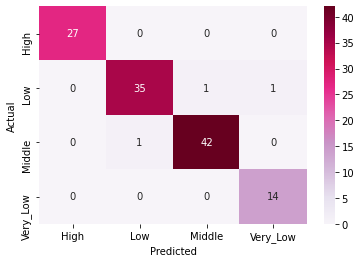

In [147]:
#confusion matrix for svm(rbf).
confusion_matrix_svm=confusion_matrix(y_test,best_rbf_pred)
sns.heatmap(confusion_matrix_svm,annot=True,cmap='PuRd')
plt.show()

# Random Forest

In [57]:
#Importing required libaries for implementing Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV



In [58]:
# Fitting Random Forest Classification to the Training set
RFC = RandomForestClassifier(n_jobs=-1)
RFC.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [59]:
# Predicting the Test set results
y_pred = RFC.predict(X_test)
confusion_matrix(y_test,y_pred)

Predicted,High,Low,Middle,Very_Low
Actual,,,,
High,27,0,0,0
Low,0,32,2,3
Middle,0,1,42,0
Very_Low,0,4,0,10


In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        27
         Low       0.86      0.86      0.86        37
      Middle       0.95      0.98      0.97        43
    Very_Low       0.77      0.71      0.74        14

    accuracy                           0.92       121
   macro avg       0.90      0.89      0.89       121
weighted avg       0.92      0.92      0.92       121



In [67]:
#RandomizedsearchCv for parameter tuning
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
grid1 = RandomizedSearchCV(estimator=RFC, param_distributions=random_grid, cv=10)
grid1.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(n_jobs=-1),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]})

In [68]:
print(grid1.best_params_)

{'n_estimators': 110, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 100, 'bootstrap': False}


In [70]:
RFC1 = RandomForestClassifier(criterion='entropy',n_estimators= 110, min_samples_split= 5, min_samples_leaf= 1, max_features= 'sqrt', max_depth= 100, bootstrap= False,n_jobs=-1)
RFC1.fit(X_train, y_train)
y_pred1 = RFC1.predict(X_test)
print(classification_report(y_test,y_pred1))


              precision    recall  f1-score   support

        High       0.96      1.00      0.98        27
         Low       0.89      0.86      0.88        37
      Middle       0.93      0.98      0.95        43
    Very_Low       0.83      0.71      0.77        14

    accuracy                           0.92       121
   macro avg       0.90      0.89      0.90       121
weighted avg       0.92      0.92      0.92       121



# Observation:


**There is only a slight improvement in metrics after hyperparameter tuning using RandomisedsearchCV,we can also use GridSearchCV to further improve metrics but it takes more time to compile as there are more parameters to fit.The Randomisedsearch can be approximated to Gridsearch by increasing the value of n_estimators**

In [71]:
feature_scores = pd.Series(RFC1.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

PEG    0.731011
LPR    0.146204
STR    0.048659
STG    0.045424
SCG    0.028702
dtype: float64

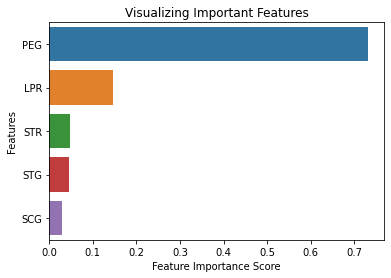

In [72]:
sns.barplot(x=feature_scores, y=feature_scores.index)



# Add labels to the graph

plt.xlabel('Feature Importance Score')

plt.ylabel('Features')



# Add title to the graph

plt.title("Visualizing Important Features")

plt.show()

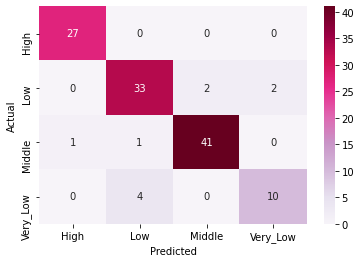

In [148]:
#confusion matrix for Random Forest.
confusion_matrix_rf=confusion_matrix(y_test,y_pred1)
sns.heatmap(confusion_matrix_rf,annot=True,cmap='PuRd')
plt.show()

# conclusions

-**Not many outliers were observed in the data** 

-**As there was no much variation in feature values so feature scaling was not performed**

-**KNN is giving the low accuracy when compared to other algoritms as all the feature values were small,not much variations were observed in distance measures which is the core classification criteria for knn algorithm,Knn is very sensitive to the scale of the data.**

-**By observing the classification reports we can say that best accuracy is obtained for Support Vector machines with RBF kernal**